In [93]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('whitegrid')

In [94]:
df = pd.read_csv('Mall_Customers.csv')

In [95]:
df.shape

(200, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


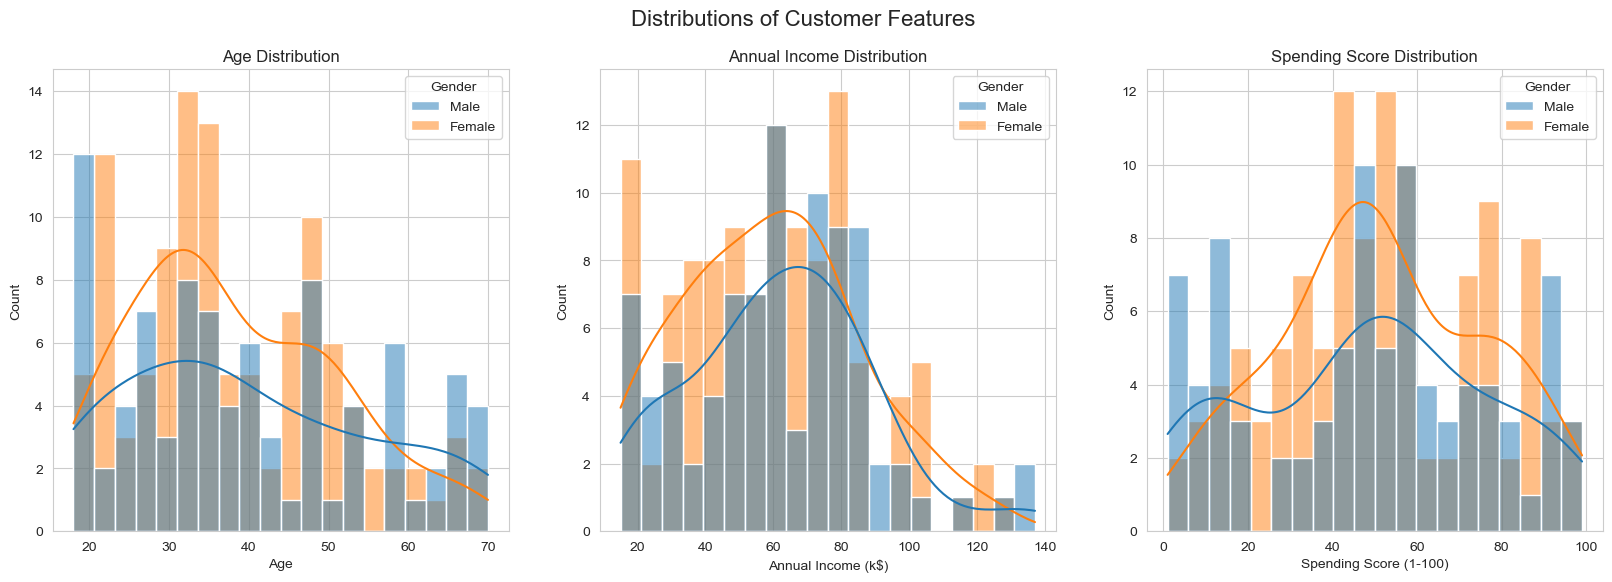

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

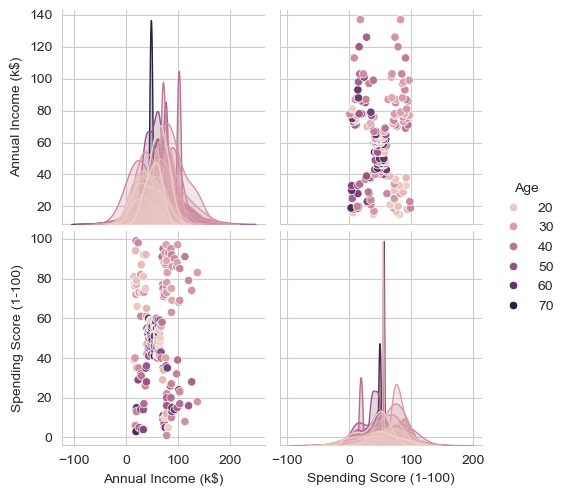

In [99]:
cols_for_pairplot = ['Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Age']

sns.pairplot(df[cols_for_pairplot], hue='Age', diag_kind='kde')
plt.show()

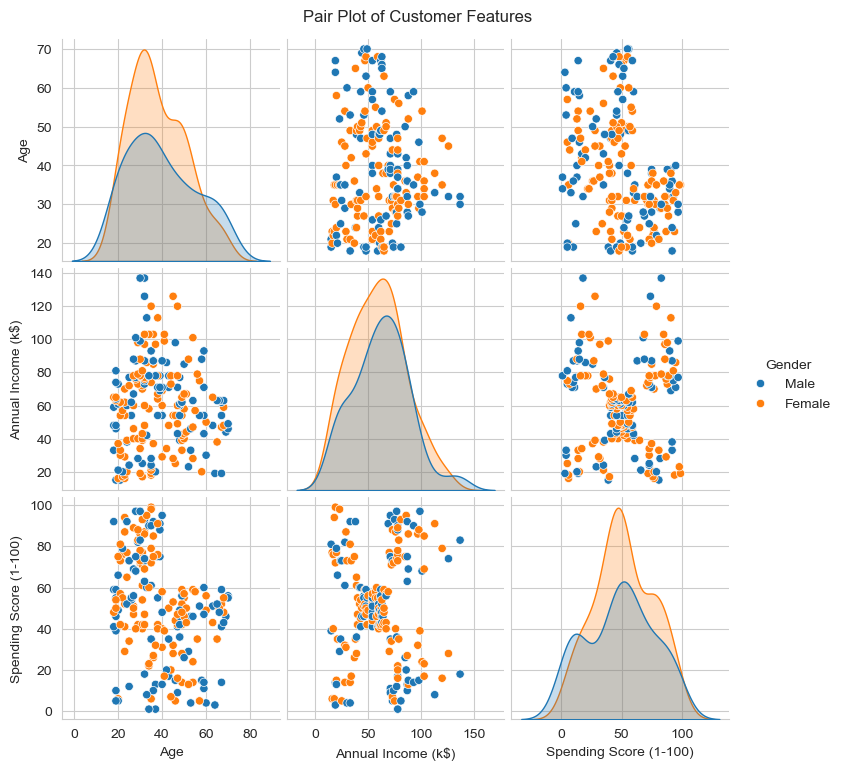

In [100]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [101]:
import plotly.express as px

In [102]:
fig = px.scatter_3d(df,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Gender',  # Automatically colors points by the 'Gender' column
                    title='3D Representation of Customer Segments',
                    labels={'Annual Income (k$)': 'Annual Income (k$)'} # You can customize labels if needed
                   )

# You can optionally adjust marker size
fig.update_traces(marker=dict(size=5))

# Show the plot
fig.show()

In [103]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings('ignore')

Text(0, 0.5, 'WCSS (Inertia)')

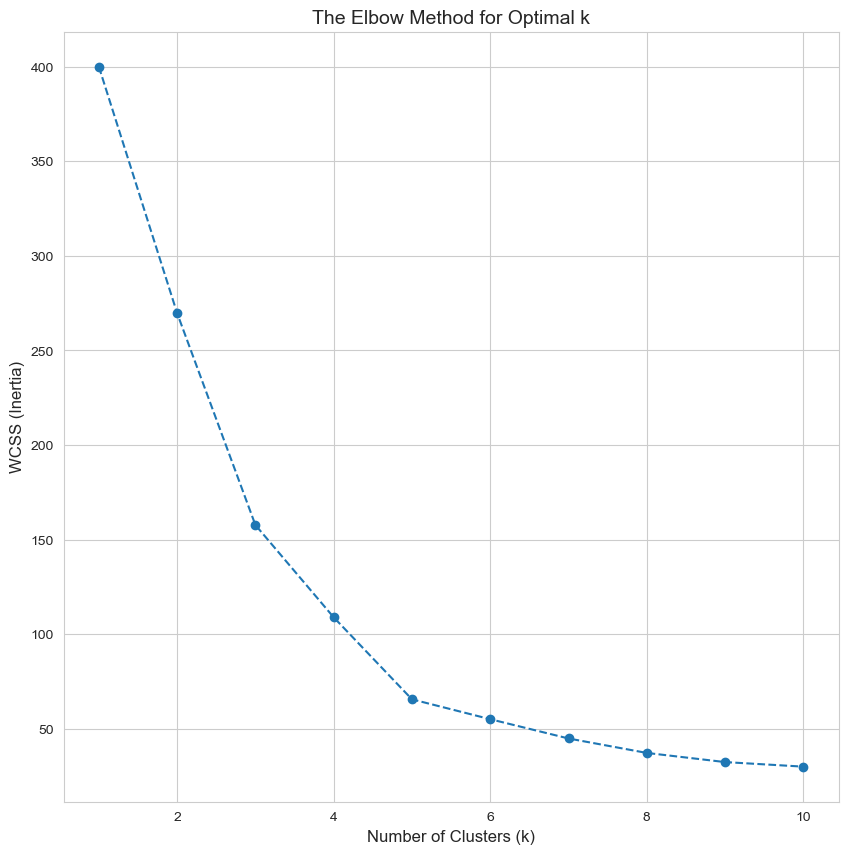

In [104]:
X1 = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_sclaed = scaler1.fit_transform(X1)

wcss1 = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_sclaed)
    wcss1.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')

plt.title('The Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)


In [105]:
kmeans1 = KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['income_cluster'] = kmeans1.fit_predict(X1_sclaed)

In [106]:
df['income_cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: income_cluster, Length: 200, dtype: int32

In [107]:
cols_to_use = ['Annual Income (k$)', 'Spending Score (1-100)', 'income_cluster']
fig = px.scatter(df,
                 x='Annual Income (k$)',
                 y='Spending Score (1-100)',
                 color='income_cluster', 
                 opacity=0.8,             
                 title="Customer Segments by Income and Spending Score")
fig.update_traces(marker=dict(size=10))
fig.show()

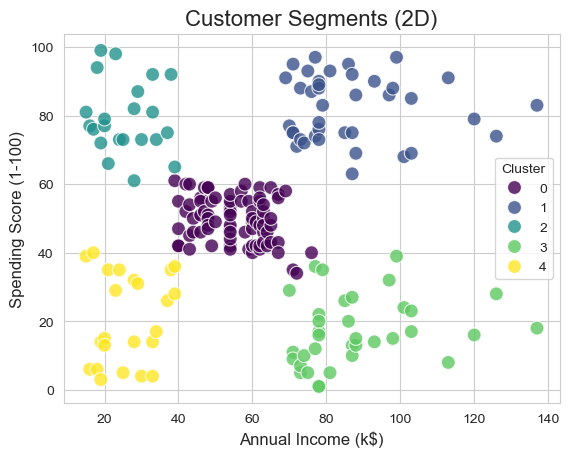

In [108]:
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='income_cluster', 
                palette='viridis',   
                s=100,                
                alpha=0.8)

plt.title('Customer Segments (2D)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [109]:
cols = ['Annual Income (k$)', 'Spending Score (1-100)']
cluster_profile = df.groupby('income_cluster')[cols].mean()

print(cluster_profile)

                Annual Income (k$)  Spending Score (1-100)
income_cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043


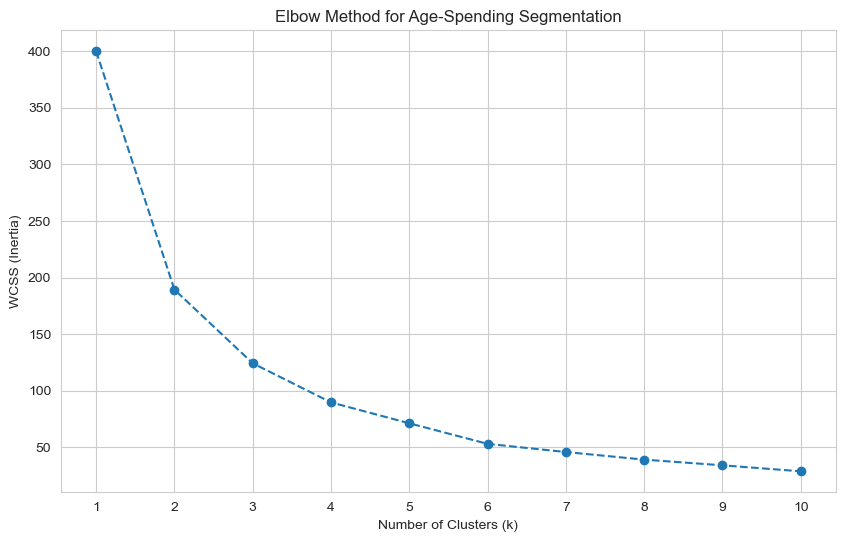

In [110]:
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

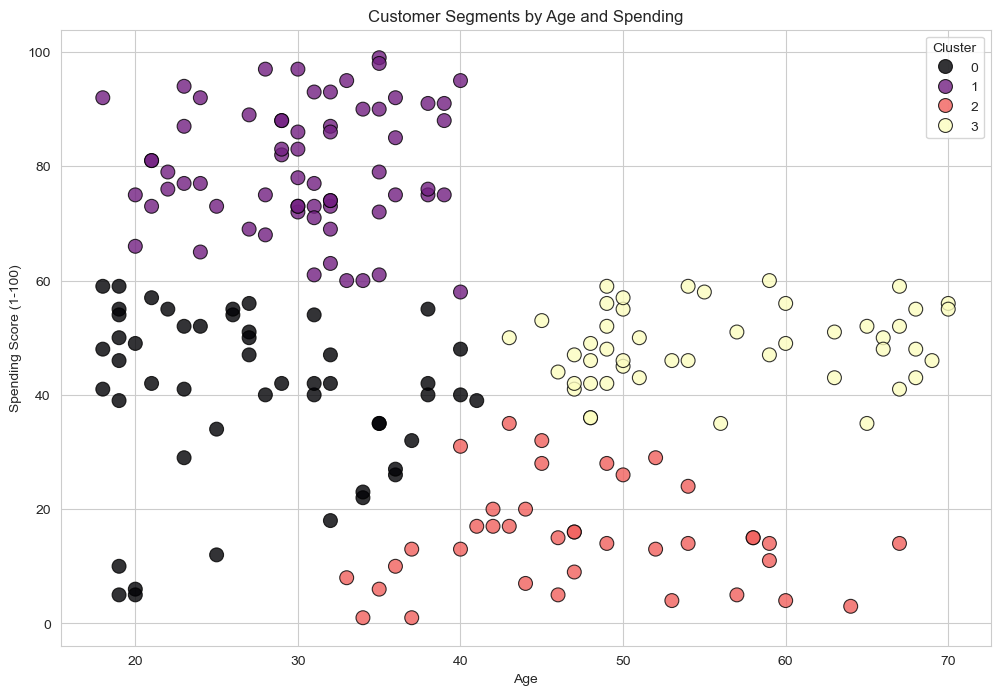

In [111]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

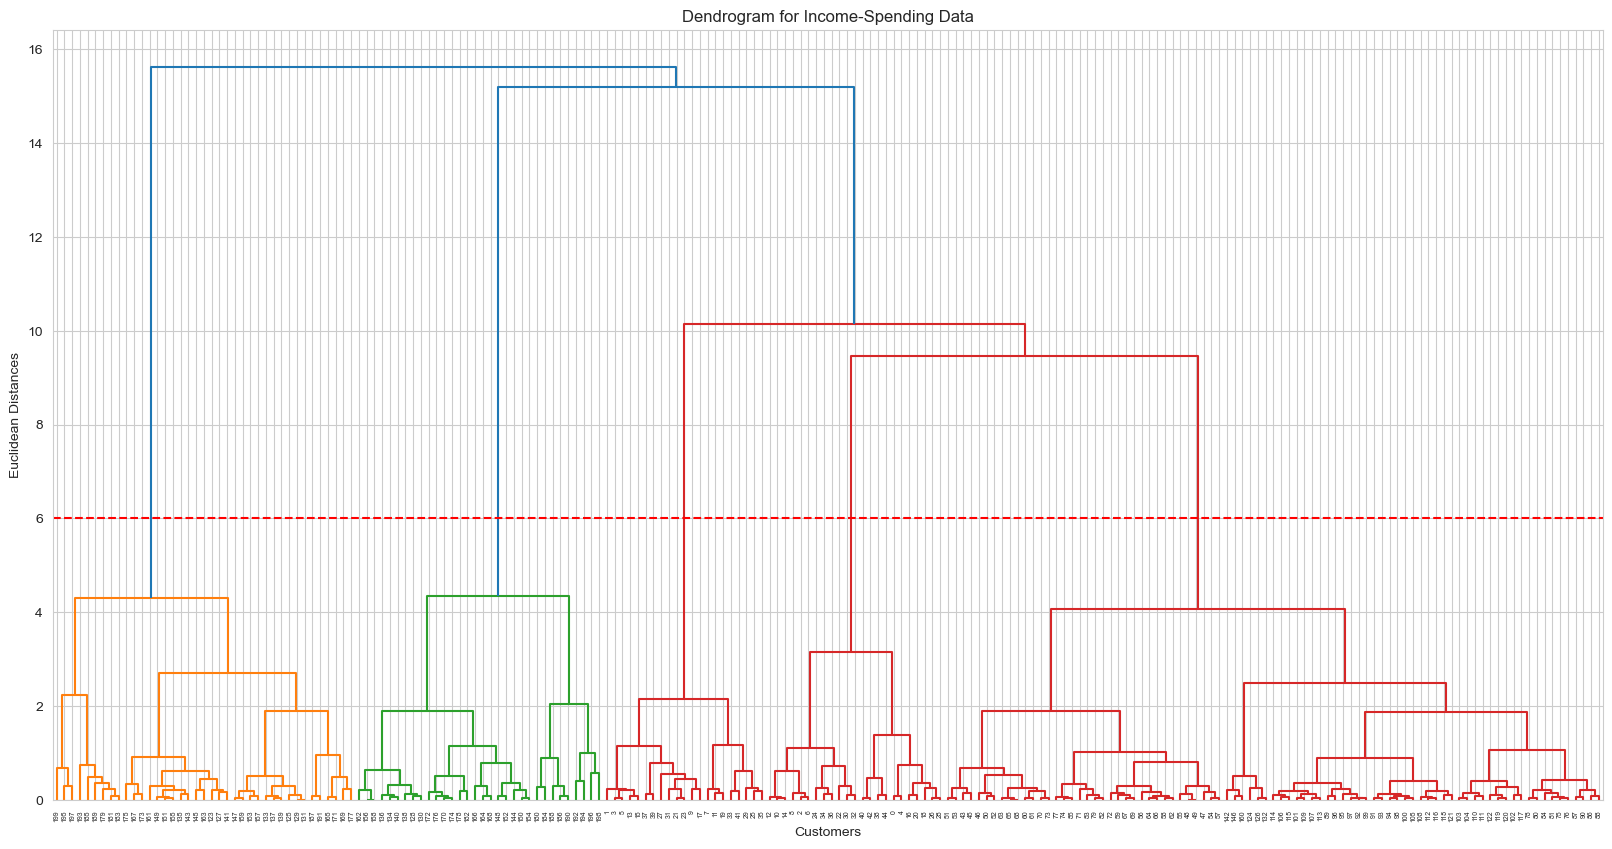

In [112]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_sclaed, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [114]:
# Load the dataset
mall_data = pd.read_csv('Mall_Customers.csv')

# Display basic information about the dataset
print("Dataset shape:", mall_data.shape)
print("\nDataset info:")
print(mall_data.info())
print("\nFirst few rows:")
print(mall_data.head())


Dataset shape: (200, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                    


1. GENDER vs SPENDING SCORE ANALYSIS

Summary Statistics by Gender:
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0

T-test results:
T-statistic: -0.8190
P-value: 0.4137
Significant difference: No


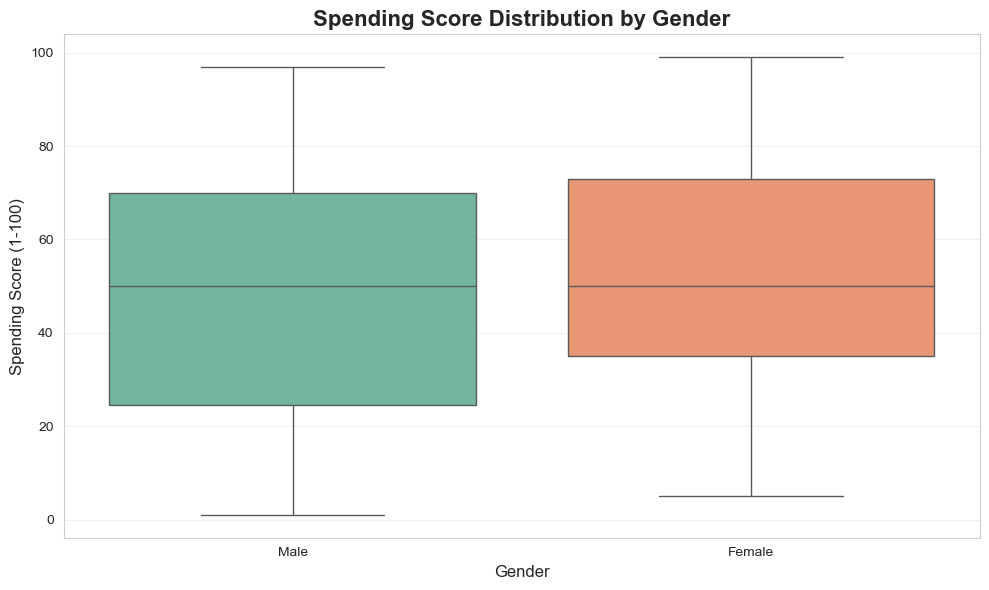

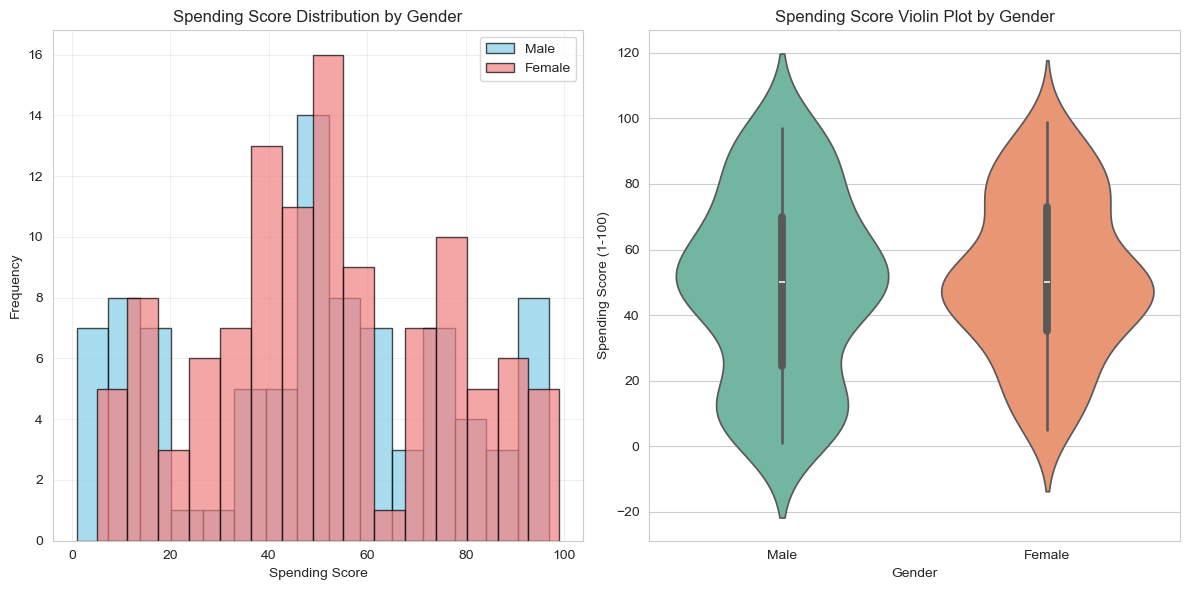

In [115]:
# =============================================================================
# 1. GENDER vs SPENDING SCORE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("1. GENDER vs SPENDING SCORE ANALYSIS")
print("="*60)

# Summary statistics by gender
gender_stats = mall_data.groupby('Gender')['Spending Score (1-100)'].describe()
print("\nSummary Statistics by Gender:")
print(gender_stats)

# Statistical test (t-test) to check if difference is significant
from scipy import stats
male_scores = mall_data[mall_data['Gender'] == 'Male']['Spending Score (1-100)']
female_scores = mall_data[mall_data['Gender'] == 'Female']['Spending Score (1-100)']

t_stat, p_value = stats.ttest_ind(male_scores, female_scores)
print(f"\nT-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Visualization 1: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, palette='Set2')
plt.title('Spending Score Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 2: Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(male_scores, bins=15, alpha=0.7, label='Male', color='skyblue', edgecolor='black')
plt.hist(female_scores, bins=15, alpha=0.7, label='Female', color='lightcoral', edgecolor='black')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Spending Score Distribution by Gender')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=mall_data, palette='Set2')
plt.title('Spending Score Violin Plot by Gender')
plt.tight_layout()
plt.show()

In [116]:
# =============================================================================
# 2. FEATURE ENGINEERING & CLUSTERING
# =============================================================================

print("\n" + "="*60)
print("2. FEATURE ENGINEERING & CLUSTERING")
print("="*60)

# Feature Engineering: Create Income-to-Age Ratio
mall_data['Income_Age_Ratio'] = mall_data['Annual Income (k$)'] / mall_data['Age']

print("\nNew feature created: Income_Age_Ratio")
print("Feature statistics:")
print(mall_data['Income_Age_Ratio'].describe())

# Prepare features for clustering
features_for_clustering = mall_data[['Income_Age_Ratio', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

print(f"\nFeatures scaled. Shape: {features_scaled.shape}")


2. FEATURE ENGINEERING & CLUSTERING

New feature created: Income_Age_Ratio
Feature statistics:
count    200.000000
mean       1.751656
std        0.954720
min        0.283582
25%        0.913443
50%        1.579802
75%        2.486111
max        4.566667
Name: Income_Age_Ratio, dtype: float64

Features scaled. Shape: (200, 2)



Optimal number of clusters (Elbow method): 4
Optimal number of clusters (Silhouette method): 7


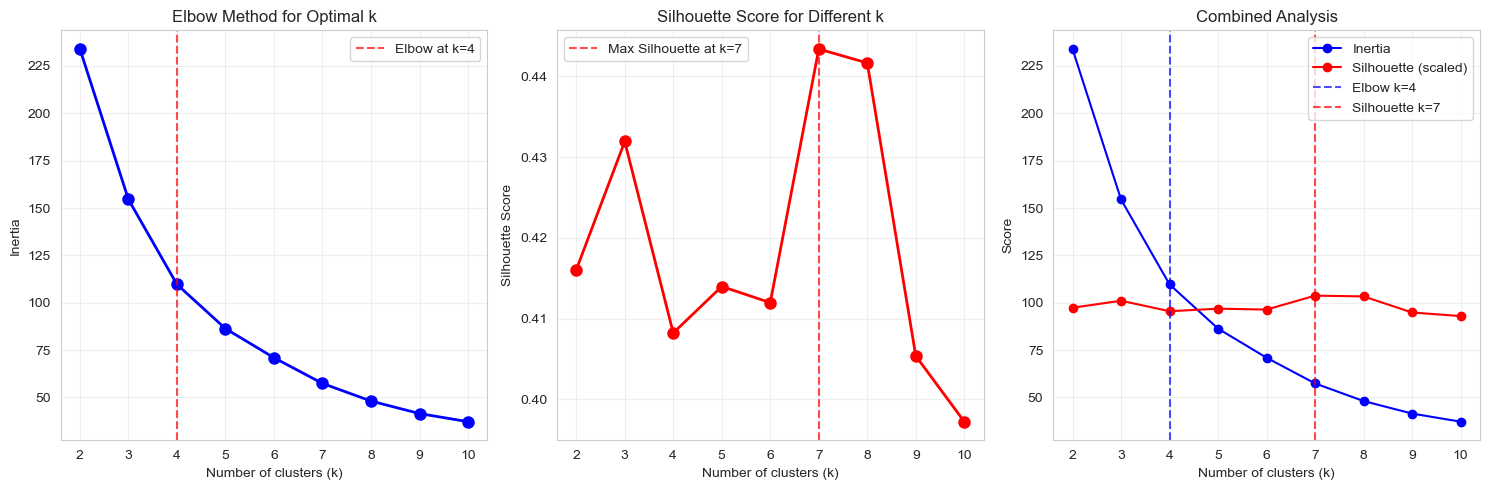

In [117]:
# =============================================================================
# 2.1 ELBOW METHOD FOR OPTIMAL CLUSTERS (CORRECTED)
# =============================================================================
inertia_values = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, inertia_values, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(alpha=0.3)

# CORRECTED elbow point detection function
def find_elbow(x_vals, y_vals):
    """Find the elbow point using perpendicular distance from line method"""
    n_points = len(x_vals)
    all_coord = np.vstack((x_vals, y_vals)).T
    
    # Line connecting first and last points
    first_point = all_coord[0]
    last_point = all_coord[-1]
    line_vec = last_point - first_point
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    
    # Vector from first point to each point
    vec_from_first = all_coord - first_point
    
    # Project each point onto the line (dot product with normalized line vector)
    scalar_product = np.dot(vec_from_first, line_vec_norm)
    
    # Calculate perpendicular distance from each point to the line
    vec_to_line = vec_from_first - np.outer(scalar_product, line_vec_norm)
    dist_to_line = np.sqrt(np.sum(vec_to_line ** 2, axis=1))
    
    # Return the k value with maximum distance (elbow point)
    return x_vals[np.argmax(dist_to_line)]

optimal_k = find_elbow(np.array(cluster_range), np.array(inertia_values))
print(f"\nOptimal number of clusters (Elbow method): {optimal_k}")

# Also find optimal k based on highest silhouette score
optimal_k_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (Silhouette method): {optimal_k_silhouette}")

# Add the elbow point to the plot
plt.subplot(1, 3, 1)
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Elbow at k={optimal_k}')
plt.legend()

plt.subplot(1, 3, 2)
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7, 
           label=f'Max Silhouette at k={optimal_k_silhouette}')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(cluster_range, inertia_values, 'bo-', label='Inertia', markersize=6)
plt.plot(cluster_range, np.array(silhouette_scores) * max(inertia_values), 'ro-', 
         label='Silhouette (scaled)', markersize=6)
plt.axvline(x=optimal_k, color='blue', linestyle='--', alpha=0.7, label=f'Elbow k={optimal_k}')
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7, 
           label=f'Silhouette k={optimal_k_silhouette}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.title('Combined Analysis')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [118]:
# =============================================================================
# 2.2 APPLY K-MEANS WITH OPTIMAL CLUSTERS
# =============================================================================

# Apply K-means with optimal number of clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)  # Using k=4 based on elbow
mall_data['Cluster'] = kmeans_final.fit_predict(features_scaled)

print(f"\nClustering completed with k=4")
print(f"Silhouette Score: {silhouette_score(features_scaled, mall_data['Cluster']):.4f}")

# Cluster analysis
cluster_analysis = mall_data.groupby('Cluster').agg({
    'Income_Age_Ratio': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': 'mean',
    'Annual Income (k$)': 'mean'
}).round(2)

print("\nCluster Analysis:")
print(cluster_analysis)


Clustering completed with k=4
Silhouette Score: 0.4082

Cluster Analysis:
        Income_Age_Ratio             Spending Score (1-100)           Age  \
                    mean   std count                   mean    std   mean   
Cluster                                                                     
0                   1.07  0.32    79                  55.85  14.29  44.03   
1                   2.91  0.62    30                  24.73  15.41  30.40   
2                   1.02  0.53    36                  19.03  11.26  48.64   
3                   2.58  0.59    55                  76.38  14.13  29.62   

        Annual Income (k$)  
                      mean  
Cluster                     
0                    45.65  
1                    84.60  
2                    49.42  
3                    76.16  


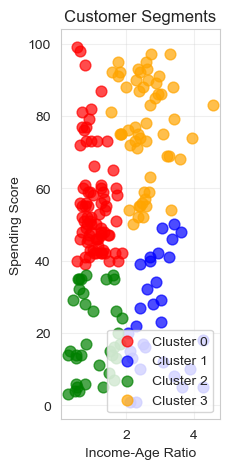

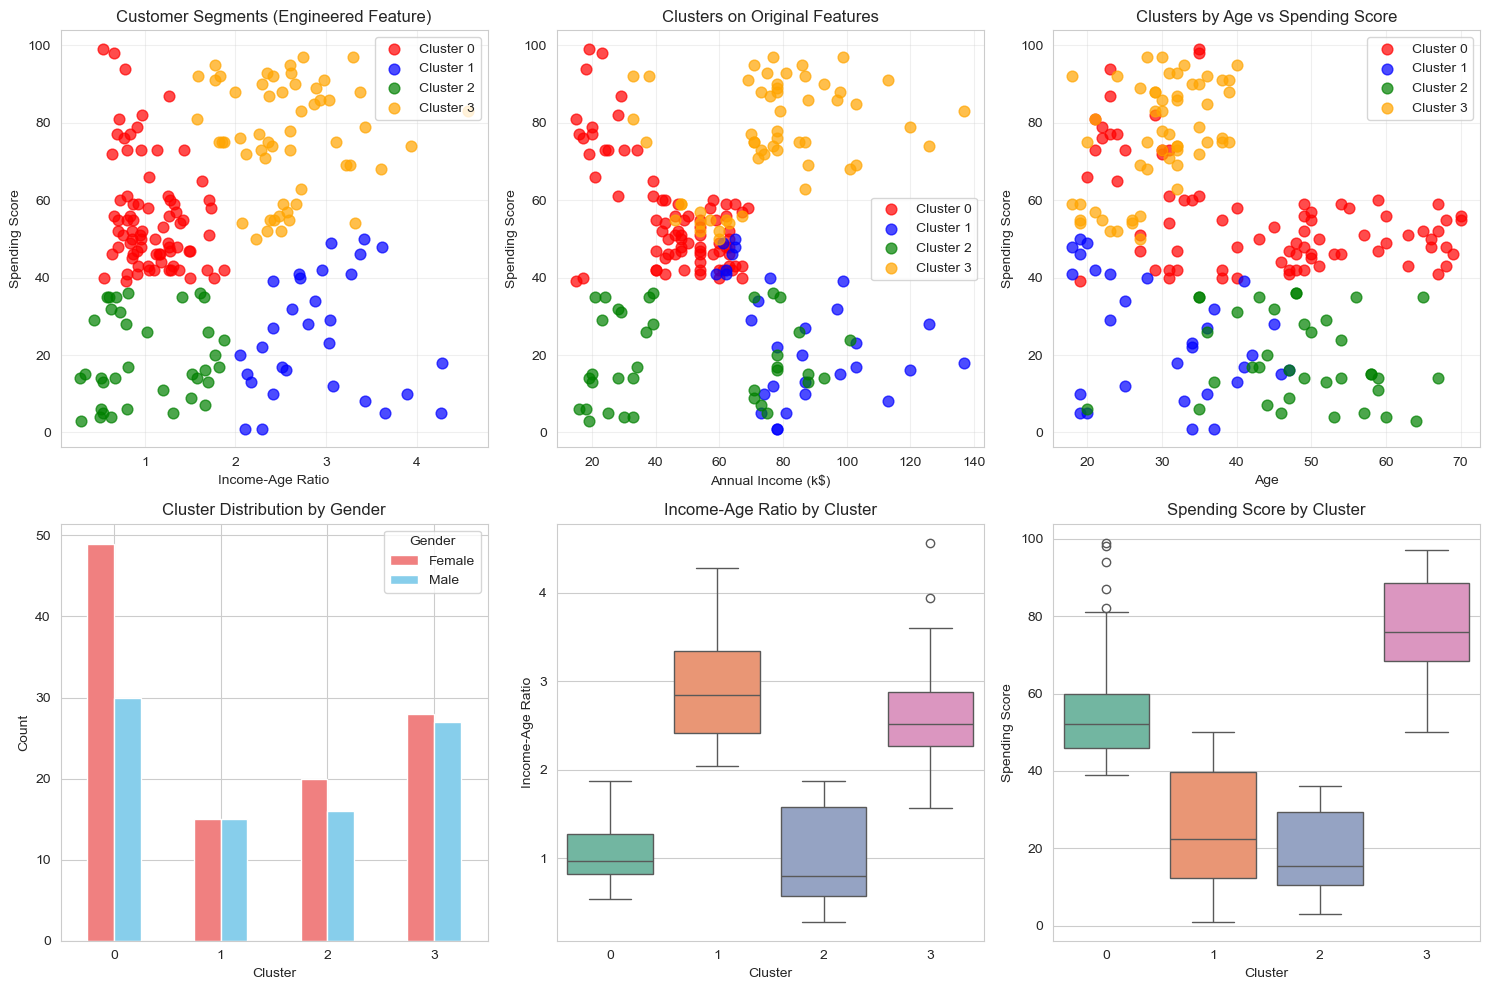

In [119]:
# =============================================================================
# 2.3 VISUALIZE CLUSTERS
# =============================================================================

# Main cluster visualization
plt.subplot(1, 3, 3)
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    cluster_data = mall_data[mall_data['Cluster'] == i]
    plt.scatter(cluster_data['Income_Age_Ratio'], 
                cluster_data['Spending Score (1-100)'], 
                c=colors[i], label=f'Cluster {i}', s=60, alpha=0.7)

plt.xlabel('Income-Age Ratio')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Detailed cluster visualization
plt.figure(figsize=(15, 10))

# Plot 1: Cluster scatter plot
plt.subplot(2, 3, 1)
for i in range(4):
    cluster_data = mall_data[mall_data['Cluster'] == i]
    plt.scatter(cluster_data['Income_Age_Ratio'], 
                cluster_data['Spending Score (1-100)'], 
                c=colors[i], label=f'Cluster {i}', s=60, alpha=0.7)
plt.xlabel('Income-Age Ratio')
plt.ylabel('Spending Score')
plt.title('Customer Segments (Engineered Feature)')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Original features scatter
plt.subplot(2, 3, 2)
for i in range(4):
    cluster_data = mall_data[mall_data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'], 
                c=colors[i], label=f'Cluster {i}', s=60, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Clusters on Original Features')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Age vs Spending Score
plt.subplot(2, 3, 3)
for i in range(4):
    cluster_data = mall_data[mall_data['Cluster'] == i]
    plt.scatter(cluster_data['Age'], 
                cluster_data['Spending Score (1-100)'], 
                c=colors[i], label=f'Cluster {i}', s=60, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters by Age vs Spending Score')
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: Cluster distribution by gender
plt.subplot(2, 3, 4)
cluster_gender = pd.crosstab(mall_data['Cluster'], mall_data['Gender'])
cluster_gender.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Cluster Distribution by Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Plot 5: Box plot of Income-Age Ratio by Cluster
plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='Income_Age_Ratio', data=mall_data, palette='Set2')
plt.title('Income-Age Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income-Age Ratio')

# Plot 6: Box plot of Spending Score by Cluster
plt.subplot(2, 3, 6)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=mall_data, palette='Set2')
plt.title('Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

In [120]:
# =============================================================================
# 2.4 CLUSTER INTERPRETATION
# =============================================================================

print("\n" + "="*60)
print("CLUSTER INTERPRETATION")
print("="*60)

cluster_names = {
    0: "Moderate Earners & Spenders",
    1: "High Spenders (Young)",
    2: "Conservative Spenders",
    3: "Affluent High Spenders"
}

for cluster in range(4):
    cluster_data = mall_data[mall_data['Cluster'] == cluster]
    print(f"\n--- CLUSTER {cluster}: {cluster_names.get(cluster, 'Unknown')} ---")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(mall_data)*100:.1f}%)")
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"Average Income-Age Ratio: {cluster_data['Income_Age_Ratio'].mean():.3f}")
    print(f"Gender Distribution: {dict(cluster_data['Gender'].value_counts())}")

# Save results
results_df = mall_data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 
                       'Spending Score (1-100)', 'Income_Age_Ratio', 'Cluster']]
results_df.to_csv('customer_segments_analysis.csv', index=False)
print(f"\nResults saved to 'customer_segments_analysis.csv'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


CLUSTER INTERPRETATION

--- CLUSTER 0: Moderate Earners & Spenders ---
Size: 79 customers (39.5%)
Average Age: 44.0 years
Average Income: $45.6k
Average Spending Score: 55.8
Average Income-Age Ratio: 1.070
Gender Distribution: {'Female': 49, 'Male': 30}

--- CLUSTER 1: High Spenders (Young) ---
Size: 30 customers (15.0%)
Average Age: 30.4 years
Average Income: $84.6k
Average Spending Score: 24.7
Average Income-Age Ratio: 2.914
Gender Distribution: {'Male': 15, 'Female': 15}

--- CLUSTER 2: Conservative Spenders ---
Size: 36 customers (18.0%)
Average Age: 48.6 years
Average Income: $49.4k
Average Spending Score: 19.0
Average Income-Age Ratio: 1.019
Gender Distribution: {'Female': 20, 'Male': 16}

--- CLUSTER 3: Affluent High Spenders ---
Size: 55 customers (27.5%)
Average Age: 29.6 years
Average Income: $76.2k
Average Spending Score: 76.4
Average Income-Age Ratio: 2.576
Gender Distribution: {'Female': 28, 'Male': 27}

Results saved to 'customer_segments_analysis.csv'

ANALYSIS COMPLETE